In [1]:
# importaciones
import pandas as pd
import numpy as np

import os
import sys

ruta = r"c:\Users\antonio\Desktop\Proyecto_Final_Data\src"  # Ruta a src
sys.path.append(ruta)  
import sp_limpieza
import sp_visualizaciones

from sp_limpieza import limpiar_nombres_columnas 
from sp_limpieza import limpiar_fechas
from sp_limpieza import convertir_a_entero
from sp_visualizaciones import graficar_histograma, graficar_boxplot

In [2]:
# carga y lectura de archivos(products)
ruta = "../data/data_raw/products.csv"
df_products_raw = pd.read_csv(ruta)

In [3]:
#creamos copia entes empezar la limpieza y transformacion
df_products = df_products_raw.copy()  

In [4]:
print(df_products.shape)  # Devuelve (filas, columnas)
df_products.info() # Muestra informacion general
df_products.head() # Muestra las primeras filas

(452, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     452 non-null    int64  
 1   ProductName   452 non-null    object 
 2   Price         452 non-null    float64
 3   CategoryID    452 non-null    int64  
 4   Class         452 non-null    object 
 5   ModifyDate    452 non-null    object 
 6   Resistant     452 non-null    object 
 7   IsAllergic    452 non-null    object 
 8   VitalityDays  452 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 31.9+ KB


,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16 08:21:49.190,Durable,Unknown,0.0
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,2017-02-12 11:39:10.970,Unknown,Unknown,0.0
2,3,Onions - Cippolini,9.1379,9,Medium,2018-03-15 08:11:51.560,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix",54.3055,9,Medium,2017-07-16 00:46:28.880,Durable,Unknown,0.0
4,5,Artichokes - Jerusalem,65.4771,2,Low,2017-08-16 14:13:35.430,Durable,True,27.0


In [5]:
# Nos interesa limpiar para unificar Nombres pero no el contenido de la columna.
#Guardar el contenido original de 'ProductName'
backup_product_name = df_products["ProductName"].copy()
#Aplicar la función de limpieza de nombres de columnas
df_products = limpiar_nombres_columnas(df_products)
#Identificar el nuevo nombre de la columna
columna_product_name = [col for col in df_products.columns if "product" in col.lower() and "name" in col.lower()][0]
#Restaurar el contenido en la columna correcta
df_products[columna_product_name] = backup_product_name
#Verificar que no haya columnas duplicadas
df_products.head()

,Product_Id,Product_Name,Price,Category_Id,Class,Modify_Date,Resistant,Is_Allergic,Vitality_Days
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16 08:21:49.190,Durable,Unknown,0.0
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,2017-02-12 11:39:10.970,Unknown,Unknown,0.0
2,3,Onions - Cippolini,9.1379,9,Medium,2018-03-15 08:11:51.560,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix",54.3055,9,Medium,2017-07-16 00:46:28.880,Durable,Unknown,0.0
4,5,Artichokes - Jerusalem,65.4771,2,Low,2017-08-16 14:13:35.430,Durable,True,27.0


In [6]:
columnas_con_fechas = ["Modify_Date"]  # Lista de columnas con fechas
df_products = limpiar_fechas(df_products, columnas_con_fechas)
df_products.head()

,Product_Id,Product_Name,Price,Category_Id,Class,Modify_Date,Resistant,Is_Allergic,Vitality_Days
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16,Durable,Unknown,0.0
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,2017-02-12,Unknown,Unknown,0.0
2,3,Onions - Cippolini,9.1379,9,Medium,2018-03-15,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix",54.3055,9,Medium,2017-07-16,Durable,Unknown,0.0
4,5,Artichokes - Jerusalem,65.4771,2,Low,2017-08-16,Durable,True,27.0


In [7]:
df_products = convertir_a_entero(df_products, "Vitality_Days")
df_products.head()

,Product_Id,Product_Name,Price,Category_Id,Class,Modify_Date,Resistant,Is_Allergic,Vitality_Days
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16,Durable,Unknown,0.0
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,2017-02-12,Unknown,Unknown,0.0
2,3,Onions - Cippolini,9.1379,9,Medium,2018-03-15,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix",54.3055,9,Medium,2017-07-16,Durable,Unknown,0.0
4,5,Artichokes - Jerusalem,65.4771,2,Low,2017-08-16,Durable,True,27.0


In [8]:
print(df_products["Resistant"].value_counts())  # Contar valores en Resistant
print(df_products["Is_Allergic"].value_counts())  # Contar valores en Is_Allergic



Resistant
Durable    164
Weak       148
Unknown    140
Name: count, dtype: int64
Is_Allergic
False      165
True       157
Unknown    130
Name: count, dtype: int64


In [9]:
df_products["Resistant"] = df_products["Resistant"].replace("Unknown", "Unspecified")
df_products["Is_Allergic"] = df_products["Is_Allergic"].replace("Unknown", "Unspecified")
df_products

,Product_Id,Product_Name,Price,Category_Id,Class,Modify_Date,Resistant,Is_Allergic,Vitality_Days
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16,Durable,Unspecified,0.0
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,2017-02-12,Unspecified,Unspecified,0.0
2,3,Onions - Cippolini,9.1379,9,Medium,2018-03-15,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix",54.3055,9,Medium,2017-07-16,Durable,Unspecified,0.0
4,5,Artichokes - Jerusalem,65.4771,2,Low,2017-08-16,Durable,True,27.0
...,...,...,...,...,...,...,...,...,...
447,448,Gatorade - Xfactor Berry,76.8988,5,Low,2017-04-22,Unspecified,False,0.0
448,449,Nantuket Peach Orange,42.1414,4,Low,2017-01-31,Unspecified,False,0.0
449,450,Wine - Vidal Icewine Magnotta,7.1070,3,Low,2017-12-01,Unspecified,Unspecified,0.0
450,451,Soup - Campbells Tomato Ravioli,93.5384,1,Low,2017-09-16,Durable,False,0.0


In [10]:
df_products.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Id,452.0,226.500000,130.625419,1.0000,113.75000,226.5000,339.25000,452.0000
Price,452.0,50.801471,28.616724,0.0449,26.50435,52.4995,75.49645,99.8755
Category_Id,452.0,5.862832,3.271694,1.0000,3.00000,6.0000,9.00000,11.0000
Vitality_Days,452.0,26.030973,39.061200,0.0000,0.00000,0.0000,52.50000,120.0000


### Como vemos algunos valores poco comunes vamos a profucdizar un poco mas en ellos
Price: min=0.0449, max=99.87 ➝ Parece bien, pero revisemos los valores extremos.
Vitality_Days: min=0, max=120 ➝ Parece normal, pero revisemos

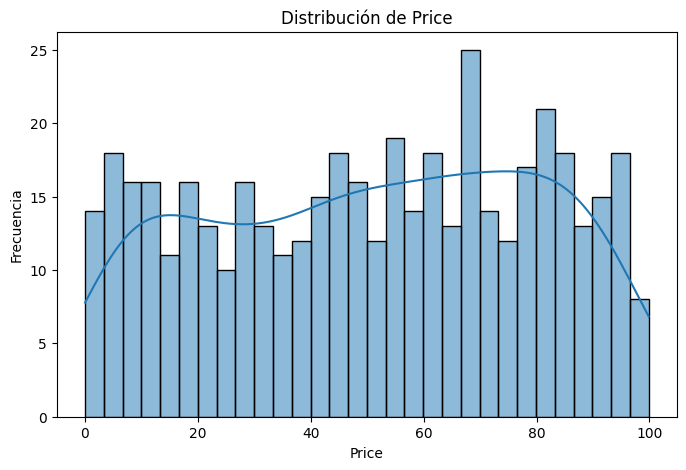

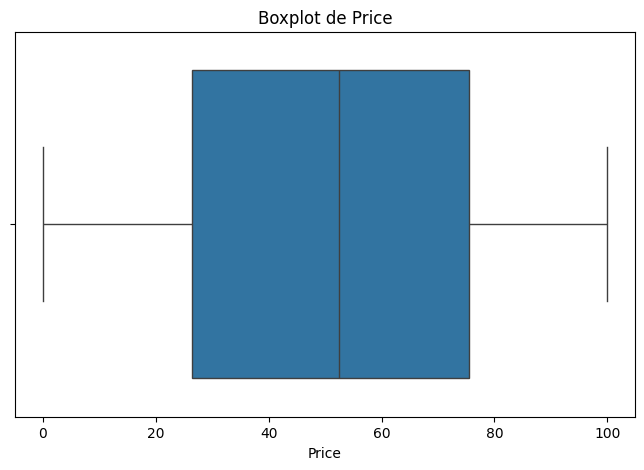

In [12]:
graficar_histograma(df_products, "Price")
graficar_boxplot(df_products, "Price")

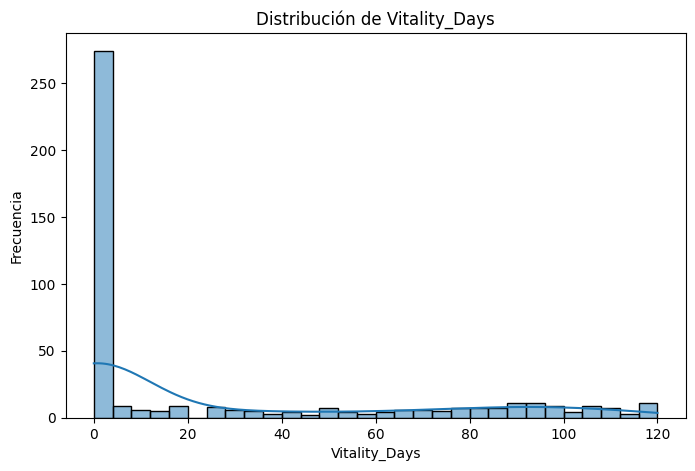

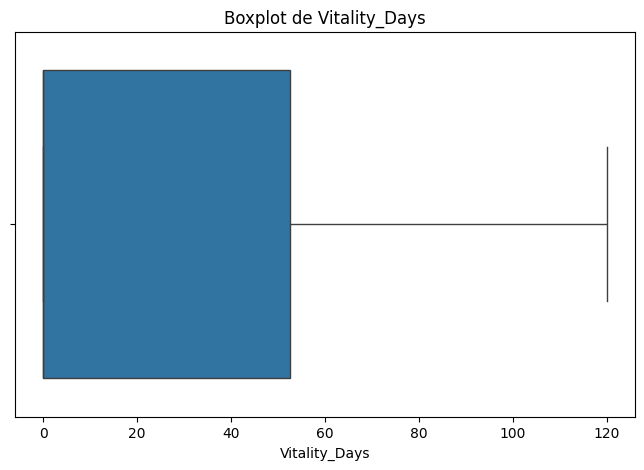

In [13]:
graficar_histograma(df_products, "Vitality_Days")
graficar_boxplot(df_products, "Vitality_Days")

In [23]:
# Filtrar solo productos con Vitality_Days = 0
productos_sin_vitalidad = df_products[df_products["Vitality_Days"] == 0]
# Contar cuántos productos con Vitality_Days = 0 hay por categoría y clase
print(productos_sin_vitalidad["Class"].value_counts())  # Ver si hay relación con 'Class'
print(productos_sin_vitalidad["Category_Id"].value_counts())  # Ver si hay relación con 'Category_Id'


Class
Medium    94
High      90
Low       90
Name: count, dtype: int64
Category_Id
1     40
7     32
3     29
9     27
4     26
11    25
2     22
10    22
5     22
6     16
8     13
Name: count, dtype: int64


In [11]:
df_products.to_csv("../data/data_limpios/products_clean.csv", index=False)